<a href="https://colab.research.google.com/github/gredy/Mlops-platzi/blob/master/Mini_Kaggle_Project_2_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mini-kaggle-1-data-set/train.csv
/kaggle/input/mini-kaggle-1-data-set/test.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train_data = pd.read_csv('train.csv')

EXPLORATORY DATA ANALYSIS

In [ ]:
train_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,id
0,78,Private,111189,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,Dominican-Republic,0,26052
1,49,Self-emp-inc,122066,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,25,United-States,0,47049
2,62,Self-emp-not-inc,168682,7th-8th,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,5,United-States,0,33915
3,18,Private,110230,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,11,United-States,0,22132
4,40,Private,373050,12th,8,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,?,0,46452


NOTICE: THERE SOME "?" IN NATIVE COUNTRY FEATURE


In [ ]:
len(train_data)

39073

In [ ]:
# looking for missing values
train_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
# exploratory analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Display basic information
df=pd.read_csv('train.csv')
print("Initial Data Overview:")
print(df.info())
print(df.head())




Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39073 non-null  int64 
 1   workclass        39073 non-null  object
 2   fnlwgt           39073 non-null  int64 
 3   education        39073 non-null  object
 4   educational-num  39073 non-null  int64 
 5   marital-status   39073 non-null  object
 6   occupation       39073 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  capital-gain     39073 non-null  int64 
 11  capital-loss     39073 non-null  int64 
 12  hours-per-week   39073 non-null  int64 
 13  native-country   39073 non-null  object
 14  income           39073 non-null  int64 
 15  id               39073 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 4.8+ MB
None
   

DISPLAY THE TARGET=INCOME

In [ ]:
# Display
df=pd.read_csv('train.csv')
print("Target Distribution:")
print(df['income'].value_counts())


Target Distribution:
income
0    29768
1     9305
Name: count, dtype: int64


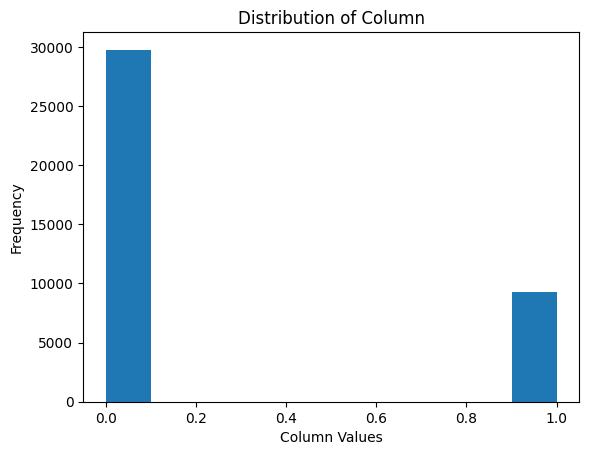

In [ ]:
# Create a histogram
plt.hist(df['income'])
plt.title('Distribution of Column')
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.show()

Encoder Process : train and test

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df=pd.read_csv('train.csv')
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].nunique() <= 10:  # Low cardinality, use Label Encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    else:  # High cardinality, use One-Hot Encoding
        df= pd.get_dummies(df, columns=[col], drop_first=True)


In [ ]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,78,4,111189,4,4,1,4,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,49,5,122066,10,0,1,4,1,0,0,...,False,False,False,False,False,False,False,True,False,False
2,62,6,168682,4,2,0,4,1,0,0,...,False,False,False,False,False,False,False,True,False,False
3,18,4,110230,6,4,3,4,1,0,0,...,False,False,False,False,False,False,False,True,False,False
4,40,4,373050,8,2,0,4,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
len(df)

39073

In [ ]:
df.to_csv('train_encoded.csv', index=False)

PARTITIONING DATA IN TRAIN AND DATA TEST

In [ ]:
from sklearn.model_selection import train_test_split
# Prepare the data
X = df.drop(['income'], axis=1)  # Feature columns (excluding the target column)
y = df["income"]  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
#LIBRARIES  OF THE CLASSIFIERS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


Adjusting the Models and parameters by scaling

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

In [ ]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "Support Vector Machine": SVC(),
     "perceptron": Perceptron(),
      "SGD Classifier": SGDClassifier(),
      "knn": KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
    }

In [ ]:

# Train and evaluate classifiers
accuracy_results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)


In [ ]:

# Display the accuracy results
import pandas as pd
from IPython.display import display

# Display the accuracy results
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Algorithm", "Accuracy"])
#print(accuracy_df)  # Or display(accuracy_df) for a formatted output

# Use display() to show the DataFrame
display(accuracy_df)

,Algorithm,Accuracy
0,Logistic Regression,1.00
1,Decision Tree,0.92
2,Random Forest,0.88
3,Support Vector Machine,0.92
4,perceptron,0.92
5,SGD Classifier,0.96
6,knn,0.80


COMPUTING EACH SCORE BY CLASSIFIERS

# DATA PROCESSING

SVM


In [ ]:
# SVM MODEL
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.92


PERCEPTRON

In [ ]:
#from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
#X, y = df(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
Perceptron()
clf.score(X, y)
print('Accuracy: ',clf.score(X, y))

Accuracy:  1.0


KNN
REFERENCE:https://scikit-learn.org/stable/modules/neighbors.html

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#X, y = df(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.8428571428571429


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
#print(clf.predict([[0, 0, 0, 0]]))
print(clf.score(X, y))

0.946


comparasion between both train and test files.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the  training dataset (which contains the test set)
df = pd.read_csv("train_encoded.csv")

# Separate features and target variables for the entire dataset
#dfe= dfe.drop(columns=["id"])  # Drop the 'id' column for feature scaling
X = df.drop(columns=["income"])
y = df["income"]  # Keep 'label' as it is ('0/'1')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features for training data
X_scaled = scaler.fit_transform(X)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Get the test data
X_test_original = df[-len(X_test):]  # Get the original test data
test_ids = X_test_original['id']  # Extract the 'id' column for the original test set

# Scale the test data (excluding 'id' and 'label' columns)
X_test_scaled = scaler.transform(X_test_original.drop(columns=[ "income"]))

# Load dataset for test.csv
test_data = pd.read_csv("test.csv")

# Process the test dataset
X_test_final = df.drop(columns=["id"])  # Drop the 'id' column
X_test_final_scaled = scaler.transform(X_test_scaled)  # Apply the same scaling

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# PERCEPTRON MODEL

* A basic neural network model that learns through updates based on misclassified points.
* Perceptron is sensitive to feature scaling, so we use StandardScaler().

In [21]:
from sklearn.linear_model import Perceptron

# Initialize and train the Perceptron model
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

# Get predictions for the test set
y_pred = perceptron.predict(X_test)

# Get predictions for the test data
y_pred_final = perceptron.predict(X_test_final_scaled)

# LOGISTIC REGRESSION

* LogisticRegression(random_state=42, max_iter=1000) ensures convergence for complex datasets.
* Prevents issues caused by varying feature scales.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on validation set
y_pred = log_reg.predict(X_test)

# Get predictions for test.csv
y_pred_final = log_reg.predict(X_test_final_std)

NameError: name 'X_test_final_std' is not defined

# SVM

* SVC(kernel='rbf') works well for complex decision boundaries.
* SVM is sensitive to feature scales, so scaling is necessary.

In [ ]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # Using RBF kernel
svm_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = svm_model.predict(X_test)

# Get predictions for test.csv
y_pred_final = svm_model.predict(X_test_final_scaled)

# DECISION TREES

* DecisionTreeClassifier(max_depth=5) prevents overfitting.
* Helps models perform better, especially with distance-based decisions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Using max_depth=5 to prevent overfitting
dt_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = dt_model.predict(X_test)

# Get predictions for test.csv
y_pred_final = dt_model.predict(X_test_final_std)


NameError: name 'X_test_final_std' is not defined

# KNN

* KNeighborsClassifier(n_neighbors=5) considers 5 nearest points for classification.
* KNN is sensitive to different feature scales, so StandardScaler is necessary.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = knn_model.predict(X_test)

# Get predictions for test.csv
y_pred_final = knn_model.predict(X_test_final_scaled)

# RANDOM FOREST

* RandomForestClassifier(n_estimators=100) creates 100 decision trees for better accuracy.
* While Random Forest isn't sensitive to scaling, keeping it consistent with previous models is good practice.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = rf_model.predict(X_test)

# Get predictions for test.csv
y_pred_final = rf_model.predict(X_test_final_scaled)

# Evaluation and Submission

In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate performance on validation set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print validation results
print(f"Validation Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)



# Create submission DataFrame
submission = pd.DataFrame({
    'id': test.csv['id'][-len('test.csv')],  # Retain the 'id' column from test.csv
    'income': y_pred_final  # Include the predicted labels
})

# Save to a CSV file
submission.to_csv('submission.csv', index=False)

# Print confirmation
print(f"Final submission file created with {len(submission)} rows.")

Validation Accuracy: 0.7554
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      8966
           1       0.48      0.49      0.49      2756

    accuracy                           0.76     11722
   macro avg       0.66      0.67      0.66     11722
weighted avg       0.76      0.76      0.76     11722



NameError: name 'test' is not defined

In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate performance on validation set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print validation results
print(f"Validation Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)



# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],  # Retain the 'id' column from test.csv
    'income': y_pred_final  # Include the predicted labels
})

# Save to a CSV file
submission.to_csv('submission.csv', index=False)

# Print confirmation
print(f"Final submission file created with {len(submission)} rows.")

Validation Accuracy: 0.7424
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      5935
           1       0.47      0.63      0.54      1880

    accuracy                           0.74      7815
   macro avg       0.67      0.71      0.68      7815
weighted avg       0.77      0.74      0.75      7815



ValueError: array length 7815 does not match index length 9769

# Decision

Upon evaluation Perceptron and Logistic Regression both equally scored the best at 0.98245. I decided to choose Logistic Regression as my final submission. In most cases, Logistic Regression is the better model because it is more robust, reliable, and provides probability outputs.